
# Install Requirements



In [ ]:
!pip install deepface
!pip install face-face_recognition
!pip install mediapipe
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 12.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=df36f33dc9ab3fe08eedd8b02357722f8fb91b0f62e9b59b96fc961ce553b04f
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire
ERROR: Could not find a version that satisfies the requirement face-face_recognition (from versions: none)
ERROR: No matching distribution found for face-face_recognition
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 37.6 MB/s eta 0:00:00
  Attempting uninst

In [ ]:
!wget -q -O detector.tflite -q https://storage.googleapis.com/mediapipe-models/face_detector/blaze_face_short_range/float16/1/blaze_face_short_range.tflite

In [ ]:
import cv2
import os
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
import math
import shutil

from mediapipe.tasks import python
from mediapipe.tasks.python import vision

from typing import Tuple, Union
import math

from PIL import Image

In [ ]:
from huggingface_hub import hf_hub_download

hf_hub_download(repo_id="FoivosPar/Arc2Face", filename="arc2face/config.json", local_dir="./models")
hf_hub_download(repo_id="FoivosPar/Arc2Face", filename="arc2face/diffusion_pytorch_model.safetensors", local_dir="./models")
hf_hub_download(repo_id="FoivosPar/Arc2Face", filename="encoder/config.json", local_dir="./models")
hf_hub_download(repo_id="FoivosPar/Arc2Face", filename="encoder/pytorch_model.bin", local_dir="./models")
#hf_hub_download(repo_id="FoivosPar/Arc2Face", filename="controlnet/config.json", local_dir="./models")
#hf_hub_download(repo_id="FoivosPar/Arc2Face", filename="controlnet/diffusion_pytorch_model.safetensors", local_dir="./models")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


arc2face/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

'models/encoder/pytorch_model.bin'

In [ ]:
!git clone https://github.com/foivospar/Arc2Face.git

!pip install -r /content/Arc2Face/requirements.txt



Cloning into 'Arc2Face'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 117 (delta 51), reused 59 (delta 16), pack-reused 0
Receiving objects: 100% (117/117), 29.07 MiB | 13.02 MiB/s, done.
Resolving deltas: 100% (51/51), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 104.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 45.8 MB/s eta 0:00:00
  Installing bui

In [ ]:
!mkdir -p ./models/antelopev2
!cp -r /content/drive/MyDrive/models/antelopev2/* /content/models/antelopev2

from huggingface_hub import hf_hub_download
hf_hub_download(repo_id="FoivosPar/Arc2Face", filename="arcface.onnx", local_dir="./models/antelopev2")

cp: cannot stat '/content/drive/MyDrive/models/antelopev2/*': No such file or directory


'./models/antelopev2/arcface.onnx'

In [ ]:
import sys
sys.path.append('/content/Arc2Face')

In [ ]:
import insightface
from insightface.app import FaceAnalysis
from arc2face import CLIPTextModelWrapper, project_face_embs
import torch
from PIL import Image
import numpy as np
import os
import cv2
from insightface.app.face_analysis import Face


ModuleNotFoundError: No module named 'insightface'

# Functions


In [ ]:
BaseOptions = mp.tasks.BaseOptions
FaceDetector = mp.tasks.vision.FaceDetector
FaceDetectorOptions = mp.tasks.vision.FaceDetectorOptions
VisionRunningMode = mp.tasks.vision.RunningMode

def initialize_mediapipe_detector(model_path='detector.tflite', min_detection_confidence=0.5):
    options = FaceDetectorOptions(
        base_options=BaseOptions(model_asset_path=model_path),
        running_mode=VisionRunningMode.IMAGE,
        min_detection_confidence=min_detection_confidence
    )
    detector = FaceDetector.create_from_options(options)
    return detector


def _normalized_to_pixel_coordinates(normalized_x, normalized_y, image_width, image_height):
    x_px = min(math.floor(normalized_x * image_width), image_width - 1)
    y_px = min(math.floor(normalized_y * image_height), image_height - 1)
    return (x_px, y_px)

def detect_faces_mediapipe(detector, image_path):
    img = cv2.imread(image_path)
    height, width, _ = img.shape
    mp_image = mp.Image.create_from_file(image_path)
    detection_result = detector.detect(mp_image)
    face_data = []

    for detection in detection_result.detections:
        bbox = detection.bounding_box
        top = int(bbox.origin_y)
        right = int(bbox.origin_x + bbox.width)
        bottom = int(bbox.origin_y + bbox.height)
        left = int(bbox.origin_x)
        face_bbox = (top, right, bottom, left)
        score = detection.categories[0].score
        keypoints = []
        for keypoint in detection.keypoints:
          keypoint_px = _normalized_to_pixel_coordinates(keypoint.x, keypoint.y, width, height)
          keypoints.append(keypoint_px)
        face_data.append((image_path, face_bbox, keypoints, score))

    return face_data

'''
def detect_faces_mediapipe2(detector, img, image_path):
    height, width, _ = img.shape
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=img)
    detection_result = detector.detect(mp_image)
    face_data = []

    for detection in detection_result.detections:
        bbox = detection.bounding_box
        top = int(bbox.origin_y)
        right = int(bbox.origin_x + bbox.width)
        bottom = int(bbox.origin_y + bbox.height)
        left = int(bbox.origin_x)
        face_bbox = (top, right, bottom, left)
        score = detection.categories[0].score
        keypoints = []
        for keypoint in detection.keypoints:
          keypoint_px = _normalized_to_pixel_coordinates(keypoint.x, keypoint.y, width, height)
          keypoints.append(keypoint_px)
        face_data.append((image_path, face_bbox, keypoints, score))

    return face_data

'''

NameError: name 'mp' is not defined

In [ ]:
image_path = "/content/drive/MyDrive/Joe_Biden_presidential_portrait.jpg"
img = cv2.imread(image_path)
detector = initialize_mediapipe_detector(min_detection_confidence=0.6)

# Detect faces and draw bounding boxes
facedata = detect_faces_mediapipe(detector, img, image_path)

# Display the image with bounding boxes
display(facedata)

In [ ]:
def expand_and_pad_image(image, target_size=512):
    # Get the current size of the image
    h, w, _ = image.shape

    # Determine the scaling factor to resize the image
    scale_factor = target_size / max(h, w)

    # Resize the image
    new_w = int(w * scale_factor)
    new_h = int(h * scale_factor)
    resized_image = cv2.resize(image, (new_w, new_h))

    # Calculate padding values to center the image
    pad_w = (target_size - new_w) // 2
    pad_h = (target_size - new_h) // 2

    # Create a new image with padding
    padded_image = cv2.copyMakeBorder(
        resized_image,
        pad_h,
        target_size - new_h - pad_h,
        pad_w,
        target_size - new_w - pad_w,
        cv2.BORDER_CONSTANT,
        value=[0, 0, 0]
    )

    return padded_image

#img = np.array(Image.open('/content/all_faces/frame06658_face00.jpg'))[:,:,::-1]

# Expand and pad the image
#padded_img = expand_and_pad_image(img, target_size=512)


In [ ]:
face_images[0]

('all_faces/frame00502_face00.jpg',
 (129, 334, 261, 202),
 [(231, 163), (255, 168), (211, 193), (223, 222), (266, 174), (330, 186)],
 0.693290114402771)

#Test

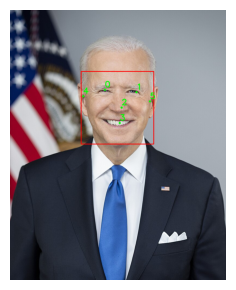

In [ ]:
def display_faces_with_keypoints(face_data_list):
    num_images = len(face_data_list)
    num_cols = 5
    num_rows = (num_images + num_cols - 1) // num_cols  # Calculate rows needed

    plt.figure(figsize=(15, num_rows * 3))

    for i, face_data in enumerate(face_data_list):
        image_path, (top, right, bottom, left), keypoints, score = face_data
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

        # Draw bounding box
        cv2.rectangle(img_rgb, (left, top), (right, bottom), (255, 0, 0), 2)

        # Draw keypoints with index numbers
        for idx, (x, y) in enumerate(keypoints):
            cv2.circle(img_rgb, (x, y), 4, (0, 255, 0), -1)
            cv2.putText(img_rgb, str(idx), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img_rgb)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

detector = initialize_mediapipe_detector('detector.tflite', min_detection_confidence=0.65)
#detector = mp.solutions.face_detection.FaceDetection(min_detection_confidence=0.65)  # Initialize the face detector
image_path = '/content/drive/MyDrive/Joe_Biden_presidential_portrait.jpg'
facesmp = detect_faces_mediapipe(detector, image_path)

# Display the detected faces with keypoints
display_faces_with_keypoints(facesmp)

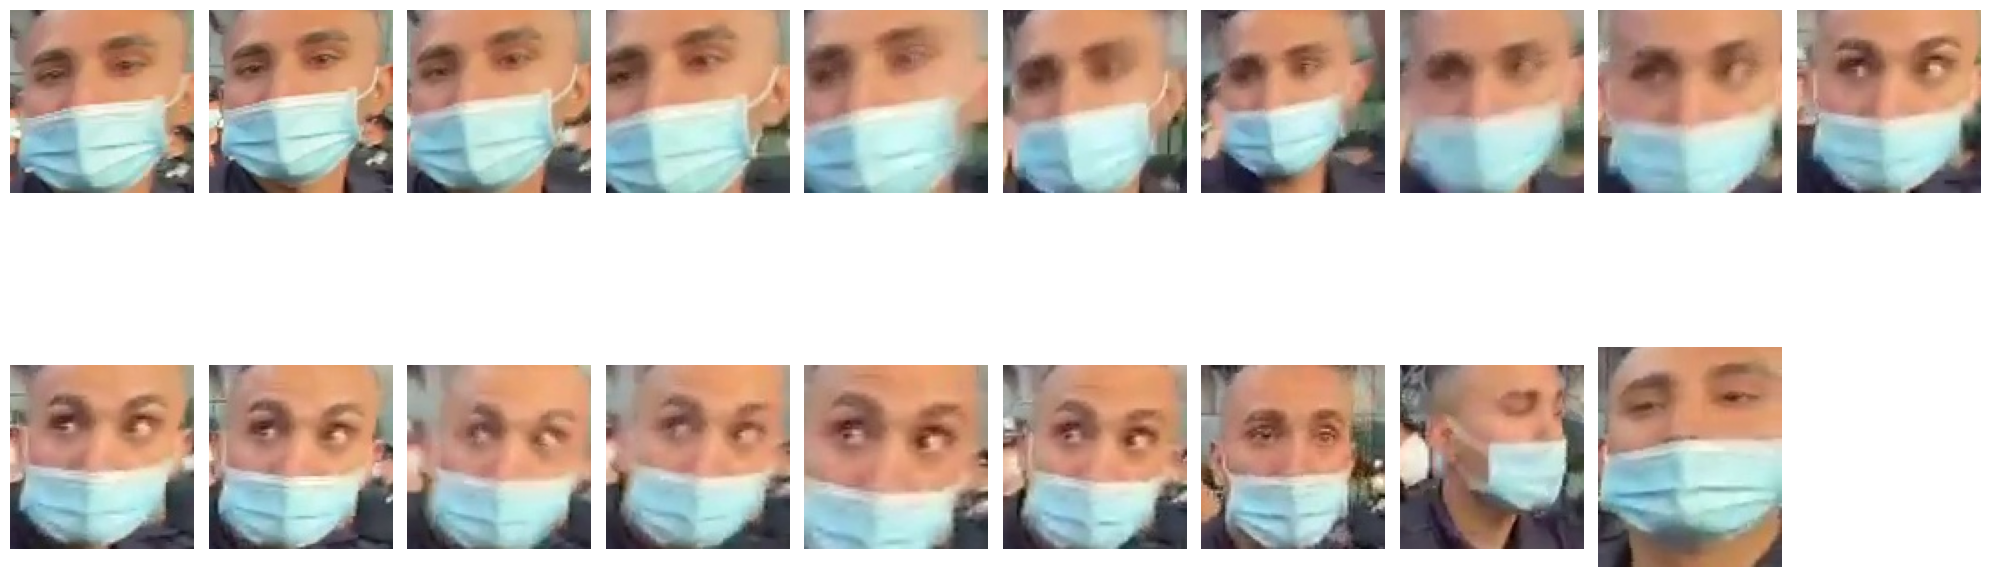

In [ ]:
def display_images_in_grid(directory_path):
    # Get the list of image files in the directory
    face_images = sorted(os.listdir(directory_path))

    # Calculate the number of columns and rows for the grid
    num_faces = len(face_images)
    num_cols = 10
    num_rows = math.ceil(num_faces / num_cols)

    plt.figure(figsize=(20, num_rows * 4))

    for idx, face_image_name in enumerate(face_images):
        face_image_path = os.path.join(directory_path, face_image_name)
        face_image = Image.open(face_image_path)
        plt.subplot(num_rows, num_cols, idx + 1)
        plt.imshow(face_image)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_images_in_grid("/content/all_faces")


In [ ]:
app = FaceAnalysis(name='antelopev2', root='./', providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(128, 128))
embeddingsingular = []
img = np.array(Image.open('/content/all_faces/frame00000_face00.jpg'))[:,:,::-1]
padded_img = expand_and_pad_image(img, target_size=512)

faces = app.get(img)
#faces = sorted(faces, key=lambda x:(x['bbox'][2]-x['bbox'][0])*(x['bbox'][3]-x['bbox'][1]))[-1]  # select largest face (if more than one detected)
id_emb = torch.tensor(faces[0]['embedding'], dtype=torch.float16)[None].cuda()
id_emb = id_emb/torch.norm(id_emb, dim=1, keepdim=True)   # normalize embedding
embeddingsingular.append(['name', id_emb.cpu()])

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'prefer_nhwc': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_enable': '0', 'enable_cuda_graph': '0', 'tunable_op_max_tuning_duration_ms': '0', 'tunable_op_tuning_enable': '0', 'cudnn_conv_use_max_workspace': '1', 'use_tf32': '1', 'cudnn_conv1d_pad_to_nc1d': '0', 'do_copy_in_default_stream': '1', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'gpu_external_empty_cache': '0', 'gpu_external_free': '0', 'gpu_external_alloc': '0', 'gpu_mem_limit': '18446744073709551615', 'arena_extend_strategy': 'kNextPowerOfTwo', 'user_compute_stream': '0', 'has_user_compute_stream': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0'}}
find model: ./models/antelopev2/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider

#Annotating

In [ ]:
def annotate_video_frames(video_path, face_data_list, output_folder):
    cap = cv2.VideoCapture(video_path)
    frame_idx = 0
    os.makedirs(output_folder, exist_ok=True)

    # Create a dictionary to store face data by frame number
    face_data_by_frame = {}
    for face_data in face_data_list:
        face_path, (top, right, bottom, left), keypoints, score, embedding = face_data
        frame_number = int(face_path.split('frame')[-1].split('_')[0])
        if frame_number not in face_data_by_frame:
            face_data_by_frame[frame_number] = []
        face_data_by_frame[frame_number].append((top, right, bottom, left, keypoints))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if frame_idx in face_data_by_frame:
            for (top, right, bottom, left, keypoints) in face_data_by_frame[frame_idx]:
                cv2.rectangle(frame, (left, top), (right, bottom), (255, 0, 0), 2)
                for idx, (x, y) in enumerate(keypoints):
                    cv2.circle(frame, (x, y), 4, (0, 255, 0), -1)
                    #cv2.putText(frame, str(idx), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        frame_path = os.path.join(output_folder, f"frame{frame_idx:05d}.jpg")
        cv2.imwrite(frame_path, frame)
        frame_idx += 1

    cap.release()


# Example usage
video_path = "/content/drive/MyDrive/ugcvids/DEF_000273269.mp4" #"/content/drive/MyDrive/COPY/VOL00001/NATIVES/NATIVE00001/Incidents-00001705.MOV" #"/content/drive/MyDrive/COPY/VOL00001/NATIVES/NATIVE00001/CCRB-00001679.MOV"
output_folder = "annotated_frames"
output_video_path = "annotated_video.mp4"


# Annotate video frames
annotate_video_frames(video_path, face_data_list, output_folder)


# Blur faces in video.

In [ ]:
def blur_video_frames(video_path, face_data_list, output_folder):
    cap = cv2.VideoCapture(video_path)
    frame_idx = 0
    os.makedirs(output_folder, exist_ok=True)

    # Create a dictionary to store face data by frame number
    face_data_by_frame = {}
    for face_data in face_data_list:
        face_path, (top, right, bottom, left), keypoints, score = face_data
        frame_number = int(face_path.split('frame')[-1].split('_')[0])
        if frame_number not in face_data_by_frame:
            face_data_by_frame[frame_number] = []
        face_data_by_frame[frame_number].append((top, right, bottom, left, keypoints))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if frame_idx in face_data_by_frame:
            for (top, right, bottom, left, keypoints) in face_data_by_frame[frame_idx]:
                # Extract the region of interest (ROI) from the frame
                roi = frame[top:bottom, left:right]
                # Apply Gaussian blur to the ROI
                blurred_roi = cv2.GaussianBlur(roi, (21, 21), 10)
                # Place the blurred ROI back into the frame
                frame[top:bottom, left:right] = blurred_roi

        frame_path = os.path.join(output_folder, f"frame{frame_idx:05d}.jpg")
        cv2.imwrite(frame_path, frame)
        frame_idx += 1

    cap.release()


video_path = "/content/drive/MyDrive/ugcvids/DEF_000273269.mp4" #"/content/drive/MyDrive/COPY/VOL00001/NATIVES/NATIVE00001/Incidents-00001705.MOV" #"/content/drive/MyDrive/COPY/VOL00001/NATIVES/NATIVE00001/CCRB-00001679.MOV"
output_folder = "annotated_frames"
output_video_path = "blurred_video.mp4"


blur_video_frames(video_path, face_images, output_folder)


In [ ]:
def reassemble_video(output_folder, output_video_path, original_video_path):
    cap = cv2.VideoCapture(original_video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    frame_idx = 0
    while True:
        frame_path = os.path.join(output_folder, f"frame{frame_idx:05d}.jpg")
        if os.path.exists(frame_path):
            frame = cv2.imread(frame_path)
            out.write(frame)
        else:
            cap = cv2.VideoCapture(original_video_path)
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
            ret, frame = cap.read()
            if not ret:
                break
            out.write(frame)
            cap.release()
        frame_idx += 1

    out.release()

    # Clean up temporary frames
    for filename in os.listdir(output_folder):
        file_path = os.path.join(output_folder, filename)
        os.unlink(file_path)
    os.rmdir(output_folder)

# Reassemble annotated frames into a video
reassemble_video(output_folder, output_video_path, video_path)


In [ ]:
def reassemble_video(output_folder, output_video_path, original_video_path):
    cap = cv2.VideoCapture(original_video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    frame_idx = 0
    while True:
        frame_path = os.path.join(output_folder, f"frame{frame_idx:05d}.jpg")
        if os.path.exists(frame_path):
            frame = cv2.imread(frame_path)
            out.write(frame)
        else:
            break  # No more frames to process
        frame_idx += 2  # Increment by 2 to use every other frame

    out.release()

# Reassemble annotated frames into a video
reassemble_video(output_folder, output_video_path, video_path)
